In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
sns.set_theme()
%matplotlib inline

In [47]:
final=pd.read_csv(r"/content/drive/My Drive/Dataset/new/final.csv")
# final=pd.read_csv(r"/content/drive/My Drive/Dataset/final.csv")

In [48]:
# for i in range(len(final)):
#     if(final.status[i] =='+2 Laps'):
#         print("HI")
#         # final.reason[i]=final.status[i]

for i in range(len(final)):
    if(final.status[i] in ['+1 Lap','+2 Laps']):
        # print("HI")
        final.reason[i]=final.status[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [49]:
final.reason.value_counts()

nd         7183
w          6551
d          5984
+1 Lap     3624
+2 Laps    1558
Name: reason, dtype: int64

In [50]:
final.status.value_counts()

Finished          6551
+1 Lap            3624
Engine            2000
+2 Laps           1558
Accident          1029
                  ... 
Tyre puncture        1
Brake duct           1
Engine misfire       1
Illness              1
+23 Laps             1
Name: status, Length: 135, dtype: int64

In [51]:
len(final)

24900

In [52]:
set(final['reason'])

{'+1 Lap', '+2 Laps', 'd', 'nd', 'w'}

In [53]:
len(final)

24900

In [54]:
final.isnull().sum()

positionOrder     0
points_x          0
fastestLap        0
name_x            0
year              0
statusId          0
nationality_x     0
dob               0
driverId          0
constructorId     0
raceId            0
circuitId         0
constructorRef    0
driverRef         0
Unnamed: 0        0
status            0
reason            0
dtype: int64

In [55]:
final['team_year'] = final.constructorRef + final.year.map(str) 
# print(final['year'][0])

In [56]:

# for i in range(10):
#   if('C(driverRef)[T.' in sd[i][0]):
    # print(sd[i])

In [57]:
# for i in range(10):
#     print(team[i])

In [58]:
# sd=sorted(d.items(),key= lambda x :x[1])
# for i in range(len(sd)):
#   if('C(r' in sd[i][0]):
#     print(sd[i])


In [59]:
# print(max(final['year']))

In [60]:
#DRIVERFINISHING VARIABLE
for i in range(len(final.status)):
  if (final['status'][i]=='Finished'):
    final.status[i] = 1
  else: 
    final.status[i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
final.status.value_counts()

0    18349
1     6551
Name: status, dtype: int64

In [62]:
# final.groupby('raceId').status.agg('sum'))
final = final.join(final.groupby('raceId')['status'].sum(), on='raceId', rsuffix='_r')
final = final.rename(columns={"status_r":"driverfinishing"})

In [63]:
# l=list(final.driverRef)
d={}
for i in range(len(final)):
    d[final.driverRef[i]]=0

# k=final.driverRef.to_list()

for i in range(len(final)):
    d[final.driverRef[i]]+=1

# for i in d.keys():
    # if(d[i] < 10)

# print(sorted(d.items(),key = lambda x:x[1],reverse=True))

l=[]
for i in range(len(final)):
    l.append(d[final.driverRef[i]])

final['Num_races_driver']=l


# removing drivers with less than 10 races
final=final.loc[final.Num_races_driver > 15]


In [64]:
# giving points

pts=[-1,25,18,15,12,10,8,6,4,2,1]
formula=lambda p :(0.1**0.2)**(p-10)
# len(pts)
# x = lambda a : a + 10
# print(x(5))
# def give_frac_pts(pos):
    # return lambda p : (0.1^0.2)^p-10

for i in range(11,max(final.positionOrder)+1):
    pts.append(formula(i))
# set(final1960_70.position_x)
t=[]
for i in final.positionOrder:
    # print(i)
    try:
        t.append(pts[i])
    except:
        print(i)
final['points']=t


In [65]:
final1950_60=final.loc[(final.year < 1960) & (final.year >=1950)]
final1960_70=final.loc[(final.year < 1970) & (final.year >=1960)]
final1970_80=final.loc[(final.year < 1980) & (final.year >=1970)]
final1980_90=final.loc[(final.year < 1990) & (final.year >=1980)]
final1990_00=final.loc[(final.year < 2000) & (final.year >=1990)]
final2000_10=final.loc[(final.year < 2010) & (final.year >=2000)]
final2010_20=final.loc[(final.year < 2020) & (final.year >=2010)]

In [66]:
# set(final2010_20.constructorRef)

In [67]:
# set(final['driverfinishing'])



1.   split dataset
2.   varibales jo add karne hai (avg no of drivers, 
3.   Add new column for constructor + year
4.   Add fractional points to non winning drivers





MODEL TRAIN


In [68]:
# 1.

fit1 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final1950_60).fit() 
fit2 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final1960_70).fit() 
fit3 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final1970_80).fit() 
fit4 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final1980_90).fit() 
fit5 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final1990_00).fit() 
fit6 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final2000_10).fit() 
fit7 = ols('points ~  C(team_year) + C(driverRef) + C(reason)  + C(circuitId)  ', data=final2010_20).fit() 
# + C(driverfinishing)
# + C(driverfinishing)
# + C(driverfinishing)
# + C(driverfinishing)
# + C(driverfinishing)
# + C(driverfinishing)
# + C(driverfinishing)




# print(fit)
# fit.summary()

In [69]:
len(set(final2010_20.driverRef))

61

In [70]:
# fit1.summary()

In [96]:
d1=dict(fit4.params)
sd=sorted(d1.items(),key= lambda x :x[1],reverse=True)
for i in sd:
    if("C(driverf" in i[0]):
        print(i)
driver=[(i[0],i[1]) for i in sd if('C(driverRef)[T.' in i[0])]
team=[(i[0],i[1]) for i in sd if('C(tea' in i[0])]


In [97]:
for i in range(0,10):
    print(driver[i])

('C(driverRef)[T.senna]', 2.21264704307578)
('C(driverRef)[T.prost]', 2.0114989840853332)
('C(driverRef)[T.watson]', 1.2753054881675994)
('C(driverRef)[T.angelis]', 1.060518417175052)
('C(driverRef)[T.guerrero]', 1.0239999256107932)
('C(driverRef)[T.lauda]', 0.8919238079492537)
('C(driverRef)[T.dumfries]', 0.8153016930386193)
('C(driverRef)[T.serra]', 0.7897424861197081)
('C(driverRef)[T.mansell]', 0.7491264763694521)
('C(driverRef)[T.lehto]', 0.7154164747865436)


In [98]:
driver_names=[i[0] for i in driver[:10]]
skill=[i[1] for i in driver[:10]]

In [99]:
for i in range(len(driver_names)):
    driver_names[i]=driver_names[i][15:-1]

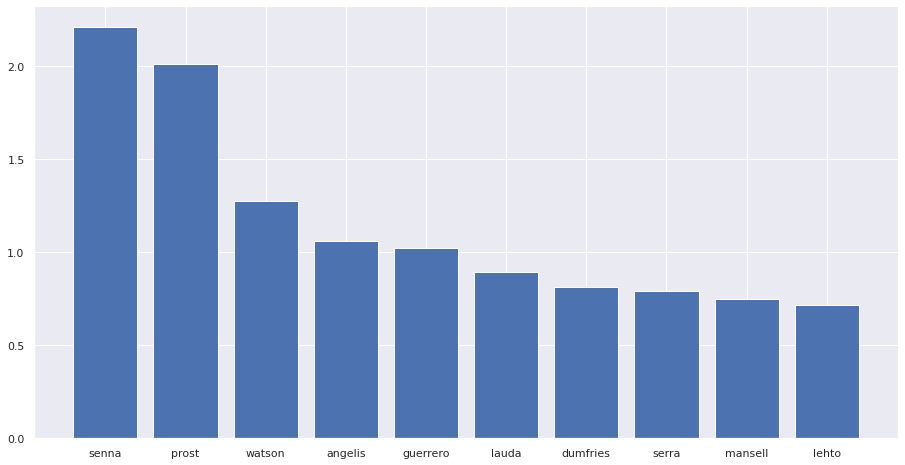

In [100]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(driver_names,skill)
plt.show()

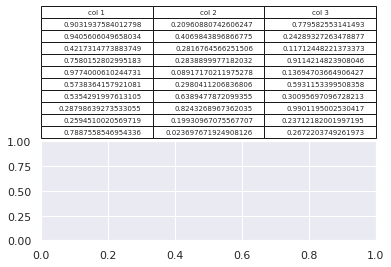

In [101]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs =plt.subplots(2,1)
clust_data = np.random.random((10,3))
collabel=("col 1", "col 2", "col 3")
axs[0].axis('tight')
axs[0].axis('off')
the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

# axs[1].plot(clust_data[:,0],clust_data[:,1])
plt.show()